In [1]:
import Pkg; 

cd(joinpath(@__DIR__, "../../"))
Pkg.activate("Project.toml")

using MorphoMol
using PyCall
using JLD2
using LinearAlgebra
using Rotations
using GLMakie
using NearestNeighbors

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMolNotebooks`
Precompiling MorphoMol
  ✓ Distributions → DistributionsTestExt
  ✓ KernelDensity
  ✓ Makie
  ✓ CairoMakie
  ✓ MorphoMol
  5 dependencies successfully precompiled in 54 seconds. 236 already precompiled.
[ Info: Precompiling MorphoMol [85e20460-a9b2-48f6-9df6-e154e9748d83]
Precompiling GLMakie
  ✓ MeshIO
  ✓ Distributions → DistributionsChainRulesCoreExt
  ✓ KernelDensity
  ✓ Makie
  ✓ GLMakie
  5 dependencies successfully precompiled in 60 seconds. 236 already precompiled.
[ Info: Precompiling GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a]
┌ Warning: Module Distributions with build ID fafbfcfd-436b-b2c2-0000-0798f2c9dc7c is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee3

In [2]:
@load "../../Data/measure_paths/jld2s/6r7m/1.jld2" dgms tps Es thetas realizations
xs = [i for i in 1:length(dgms)];

In [23]:
function get_density_from_dgm(xs,ys,dgm,search_radius = 5.0)
    tree = KDTree(transpose(dgm))
    [length(inrange(tree, [x, y], search_radius)) for x in xs, y in ys]
end

get_density_from_dgm (generic function with 2 methods)

In [43]:
sr = 0.5
xs = [e for e in 0.0:0.25:25.0]
ys = [e for e in 0.0:0.25:25.0]
zs = get_density_from_dgm(xs, ys, dgms[end][2], sr)

101×101 Matrix{Int64}:
 0  0  0  0  0  0   0   0   0   0   0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0   0   1   1   0   0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0   1   1   1   2   1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  1   1   1   1   2   1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  3  3   3   1   1   2   3     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  3  3   7   7   2   3   5  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  3  7  10  10  11   5   7     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  5   9  11  23  29  20     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0   8  15  32  38  42     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0   0  11  32  39  47     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0   0   0  23  38  43  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0   0   0   0  21  27     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0   0   0   0   0  13     0  0  0  0 

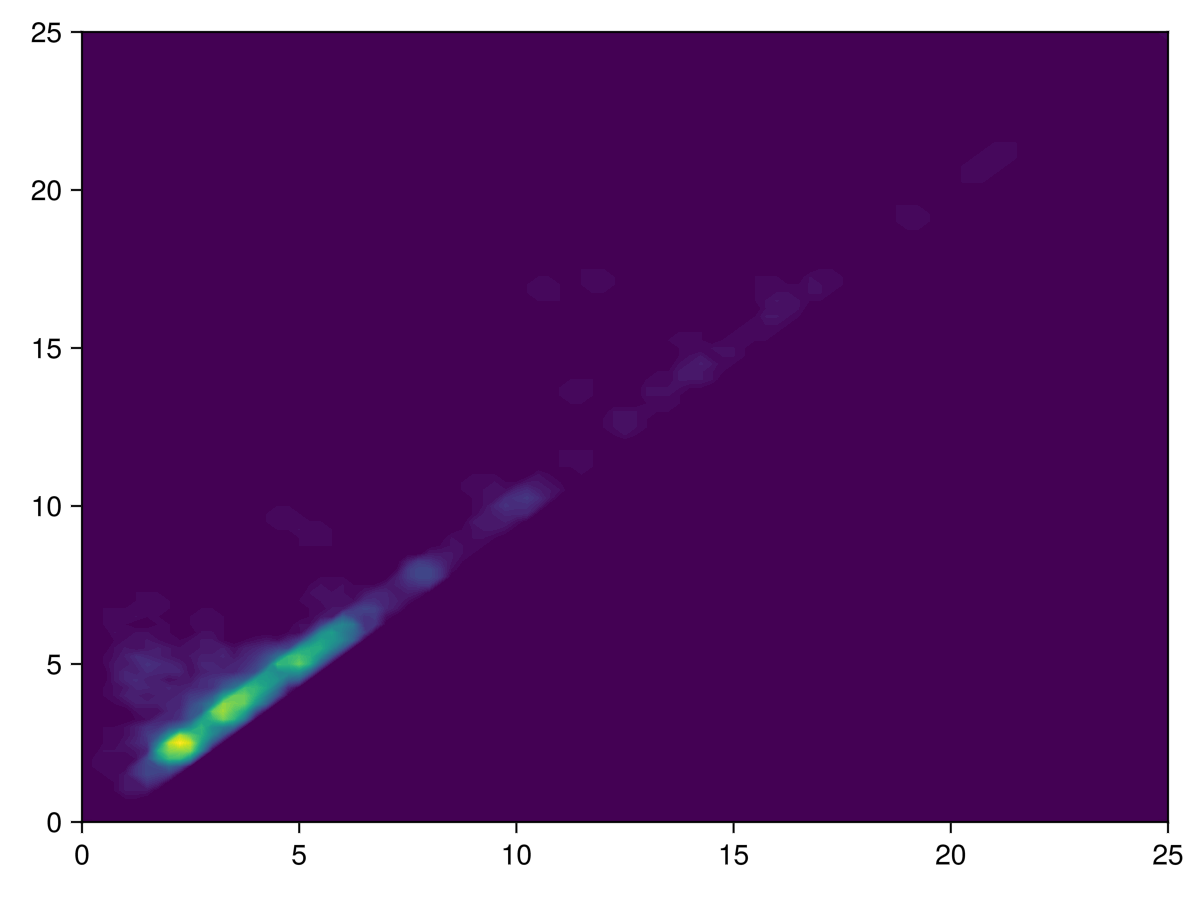

In [49]:
f = Figure()
ax = Axis(f[1, 1])

c = contourf!(ax, [xs, ys, zs]..., levels = 50)
f

In [9]:
f = Figure(fontsize=7)
ax = Axis(f[1, 1])
contourf!(x,y,z)
f

: 